# **1) Delivery_time -> Predict delivery time using sorting time** 


------------------------------------------------------------

# **Build a simple linear regression model by performing EDA and do necessary **Transformations and select the best model using R or Python. 


In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
data = pd.read_csv('/content/delivery_time.csv')


In [582]:
#last few row of the data set
data.tail(10)

,Delivery Time,Sorting Time
11,10.75,4
12,16.68,7
13,11.50,3
14,12.03,3
15,14.88,4
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [583]:
#data structure
data.shape

(21, 2)

In [584]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [585]:
#data types
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [586]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


## **TO FIND DUPLICATES**

In [587]:
 data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [588]:
data[ data.duplicated()].shape

(0, 2)

In [589]:
# there is no duplicated row

## **RENAME COLUMNS**

In [590]:
data=data.rename({'Delivery Time':'DT'},axis=1)
data=data.rename({'Sorting Time':'ST'},axis=1)

In [591]:
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## **CORRELATION**

In [592]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [593]:
####distribution plot of Delivery_time	Sorting_time

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


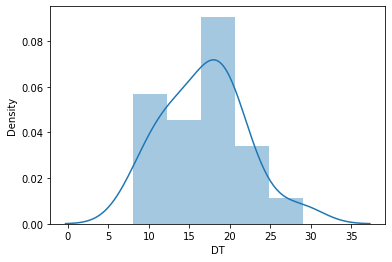

In [594]:
import seaborn as sns
sns.distplot(data['DT'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


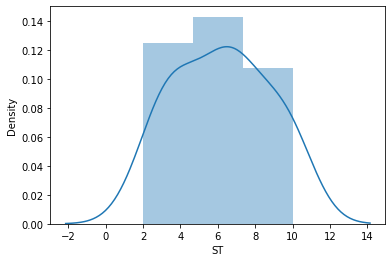

In [595]:
import seaborn as sns
sns.distplot(data['ST'])

## **OUTLIER DETECTION**

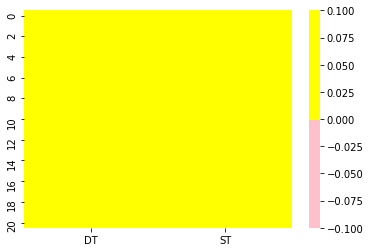

In [596]:
cols = data.columns 
colours = ['#ffc0cb', '#ffff00']
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

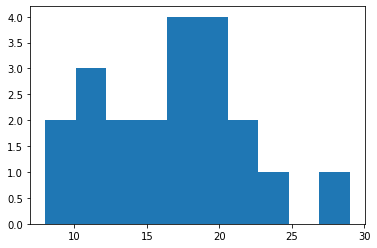

In [597]:
#USING HISTOGRAM
plt.hist(data.DT)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

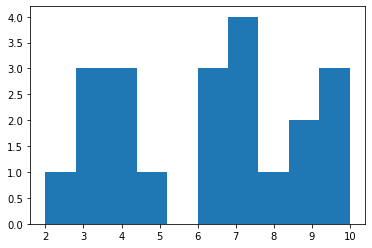

In [598]:
plt.hist(data.ST)


{'boxes': [<matplotlib.lines.Line2D at 0x7f4b5e62eed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4b5f3e6bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4b5f5b1d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4b5f37bf10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4b5e62ed50>,
  <matplotlib.lines.Line2D at 0x7f4b5f3e6890>]}

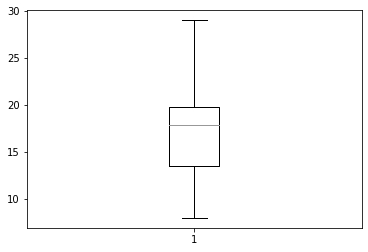

In [599]:
plt.boxplot(data.DT)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4b5e3c78d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4b5e42ee50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4b5e2d55d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4b5e42e650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4b5e3c70d0>,
  <matplotlib.lines.Line2D at 0x7f4b5e3c72d0>]}

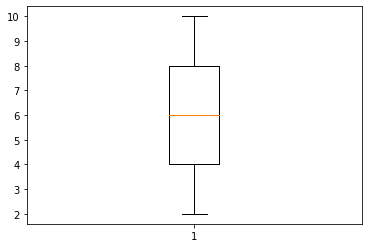

In [600]:
plt.boxplot(data.ST)

In [601]:
#descriptive stst
data.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [602]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


## **FITTING REGRESSION MODEL**

In [603]:
 import statsmodels.formula.api as smf
 model=smf.ols("DT~ST", data= data).fit()

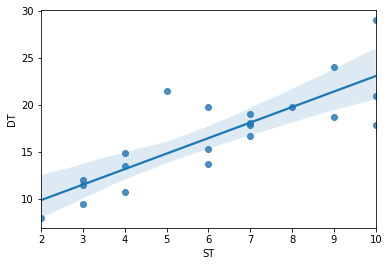

In [604]:
sns.regplot(x="ST", y="DT", data=data);

## **[COEFFICIENTS] beta0 and beta1**

In [605]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [606]:
### Bo==intercept,  Bo1--ST

In [607]:
###t values and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


## **##R^2 values**

In [608]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [609]:
model

In [610]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        17:32:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **THUS , WE GOT THE RSQUARED VALUE. WITH REGRESSION MODEL OF 68.2% ACCURACY, which is not so good model to be relied upon. So do some transformatins to get more accuracy**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


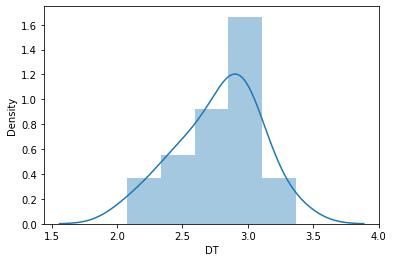

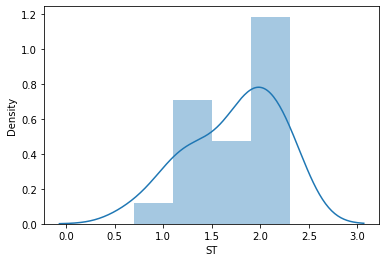

<Figure size 432x288 with 0 Axes>

In [611]:
data1=data
data1['DT'] = np.log(data1['DT'])
data1['ST'] = np.log(data1['ST'])
sns.distplot(data1['DT'])
fig = plt.figure()
sns.distplot(data1['ST'])
fig = plt.figure()

In [612]:
model2 = smf.ols("DT~ST",data = data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           1.60e-07
Time:                        17:32:37   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
ST             0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **THUS , WE GOT THE RSQUARED VALUE. WITH REGRESSION MODEL OF 77.2% ACCURACY, which is good model to be relied upon. Eventhough, do some transformatins to get more accuracy**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


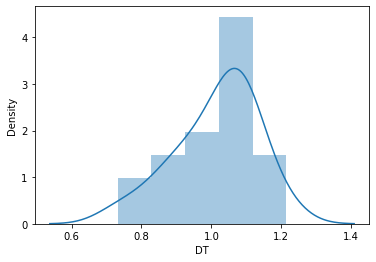

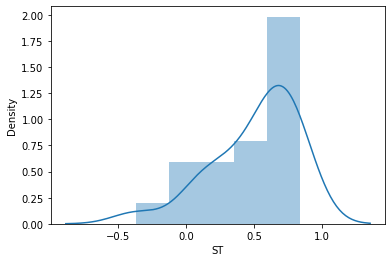

<Figure size 432x288 with 0 Axes>

In [613]:
data2=data
data2['DT'] = np.log(data2['DT'])
data2['ST'] = np.log(data2['ST'])
sns.distplot(data2['DT'])
fig = plt.figure()
sns.distplot(data2['ST'])
fig = plt.figure()

In [614]:
model3 = smf.ols("DT~ST",data = data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           4.05e-08
Time:                        17:32:38   Log-Likelihood:                 32.435
No. Observations:                  21   AIC:                            -60.87
Df Residuals:                      19   BIC:                            -58.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8447      0.023     37.344      0.000       0.797       0.892
ST             0.3357      0.038      8.787      0.000       0.256       0.416
==============================================================================
Omnibus:                        0.458   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.359
Skew:                           0.284   Prob(JB):                        0.836
Kurtosis:                       2.706   Cond. No.                         4.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **THUS , WE GOT THE RSQUARED VALUE. WITH REGRESSION MODEL OF 80.3% ACCURACY, which is good model to be relied upon. Eventhough, do some transformatins to get more accuracy**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


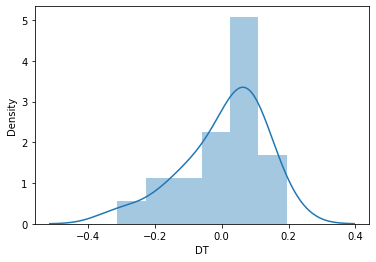

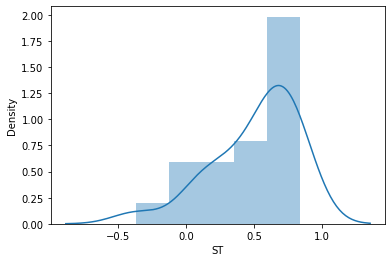

<Figure size 432x288 with 0 Axes>

In [615]:
data3=data
data['DT'] = np.log(data['DT'])
sns.distplot(data['DT'])
fig = plt.figure()
sns.distplot(data['ST'])
fig = plt.figure()

In [616]:
model4 = smf.ols("DT~ST",data=data3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     88.53
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           1.39e-08
Time:                        17:32:38   Log-Likelihood:                 32.742
No. Observations:                  21   AIC:                            -61.48
Df Residuals:                      19   BIC:                            -59.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1718      0.022     -7.708      0.000      -0.218      -0.125
ST             0.3542      0.038      9.409      0.000       0.275       0.433
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.282
Skew:                           0.221   Prob(JB):                        0.868
Kurtosis:                       2.644   Cond. No.                         4.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **THUS , WE GOT THE RSQUARED VALUE. WITH REGRESSION MODEL OF 82.3% ACCURACY, which is good model to be relied upon.**

In [617]:
model4.conf_int=0.005

## **# # Predict for new data point**

In [618]:
#Predict delivery time for 8min and 20min Sorting Time


In [619]:
newdata=pd.Series([8,20])

In [620]:
datapred=pd.DataFrame(newdata,columns=['ST'])
datapred

,ST
0,8
1,20


In [621]:
yhat_log = model4.predict(datapred)

yhat_log

0    2.661963
1    6.912644
dtype: float64

In [622]:
yhat_exp= np.exp(yhat_log)

In [623]:
yhat_exp


0      14.324384
1    1004.900944
dtype: float64

# **for 8min and 20min Sorting Time,  delivery time would expect to be  14.324384 AND 1004.900944  respectively**

**we have got the greater values for ST-20. because in the data set, the ST range is between 2-10. in order to get the correct predicted values, just include the ST=20 By normal method and load it in to the main data set. then find the regression equation . we can get good regression model**